# Model selection experiment by effect size

Model selection experiment by effect size

In [1]:
import pandas as pd
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import arx.experiments as ex

In [2]:
incdata = pd.read_csv('../results/1-hard-by-included-effect.csv')
exdata = pd.read_csv('../results/1-hard-by-excluded-effect.csv')

In [3]:
schemes = incdata.scheme.unique()

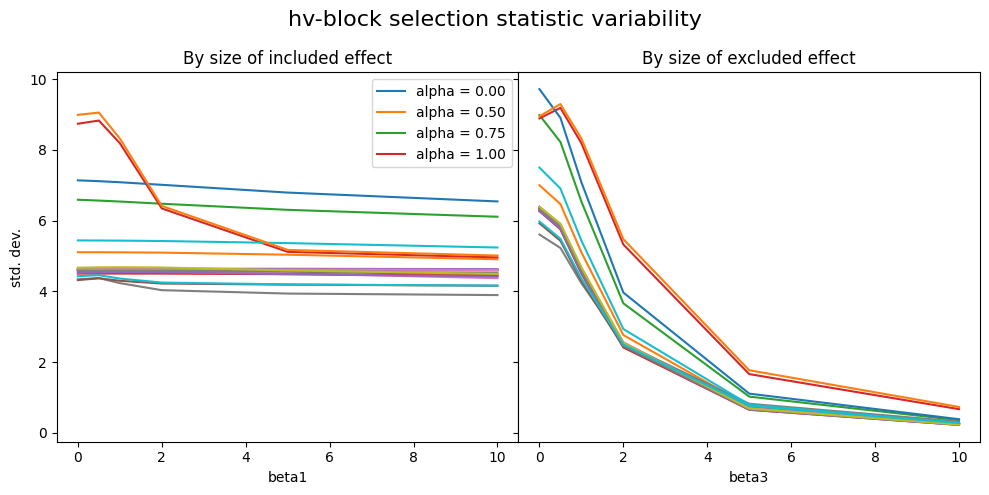

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
iax, eax = ax

markers = ["o", "s", "d", "x"]

for scheme in schemes:
    for j, (alpha, marker) in enumerate(zip(ex.ALPHA_SM, markers)):
        sel = np.bitwise_and(incdata.scheme == scheme, incdata.alpha == alpha)
        beta0 = incdata[sel].beta0
        cv_std = incdata[sel].cv_std
        iax.plot(beta0, cv_std)
iax.legend([f"alpha = {alpha:0.2f}" for alpha in ex.ALPHA_SM])
iax.set_title("By size of included effect")
iax.set_xlabel("beta1")
iax.set_ylabel("std. dev.")

for scheme in schemes:
    for j, (alpha, marker) in enumerate(zip(ex.ALPHA_SM, markers)):
        sel = np.bitwise_and(exdata.scheme == scheme, exdata.alpha == alpha)
        beta2 = exdata[sel].beta2
        cv_std = exdata[sel].cv_std
        eax.plot(beta2, cv_std)
eax.set_title("By size of excluded effect")
eax.set_xlabel("beta3")

fig.suptitle("hv-block selection statistic variability", fontsize=16)
fig.tight_layout()

plt.subplots_adjust(wspace=0, hspace=0)


KeyError: 'beta0s'

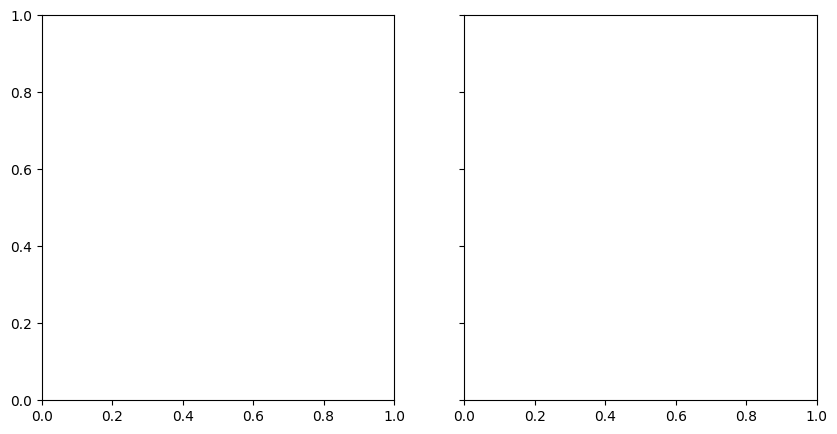

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
iax, eax = ax

handles = []
for j, alpha in enumerate(incdata):
    betas = incdata[alpha]["beta0s"]
    cv_mean = np.array([e.mean() for e in incdata[alpha]["cvs"]])
    cv_std = np.array([e.std() for e in incdata[alpha]["cvs"]])
    cv_min, cv_max = cv_mean - 2 * cv_std, cv_mean + 2 * cv_std
    pl = iax.plot(betas, cv_mean)
    fi = iax.fill_between(betas, cv_min, cv_max, alpha=0.2)
    fi2 = eax.fill(np.NaN, np.NaN, alpha=0.2, color=fi.get_facecolor())
    handles.append((pl[0], fi2[0]))
iax.legend(handles, [f"phi = {fmt_phi(incdata[alpha]['phi'])}" for alpha in incdata])
iax.set_title("By size of included effect")
iax.set_xlabel("beta[0]")
iax.set_ylabel("selection statistic mean and range")
iax.axhline(0, color="k", linestyle="-")

handles = []
for j, alpha in enumerate(exdata):
    label = fmt_phi(exdata[alpha]["phi"])
    cv_mean = np.array([e.mean() for e in exdata[alpha]["cvs"]])
    cv_std = np.array([e.std() for e in exdata[alpha]["cvs"]])
    cv_min, cv_max = cv_mean - 2 * cv_std, cv_mean + 2 * cv_std
    hs = exdata[alpha]["beta2s"]
    pl = eax.plot(hs, cv_mean, label=label)
    fi = eax.fill_between(hs, cv_min, cv_max, alpha=0.2, label=label)
    fi2 = eax.fill(np.NaN, np.NaN, alpha=0.2, linewidth=0, color=fi.get_facecolor())
    handles.append((pl[0], fi2[0]))
eax.legend(handles, [f"phi = {fmt_phi(exdata[alpha]['phi'])}" for alpha in exdata])
eax.axhline(0, color="k", linestyle="-")
eax.set_title("By size of excluded effect")
eax.set_xlabel("beta[2]")

fig.suptitle("hv-block selection statistic mean and range", fontsize=16)
fig.tight_layout()

plt.subplots_adjust(wspace=0, hspace=0)
